In [39]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [18]:
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

root = 'kitti/' # path of kitti dataset root 
training_image_path = os.path.join(root, 'training/image_2')  # path of training images, 000000.png~007480.png
training_label_path = os.path.join(root, 'training/label_2')  # path of training labels 000000.txt~007480.txt
# files = [os.path.join(training_label_path,f) for f in os.listdir(training_label_path)] # get all labels txt
files = glob.glob(os.path.join(training_label_path, '*.txt'))  # get all labels txt
files.sort()  # sort the files

class_list = ['car', 'van', 'truck', 'pedestrian', 'person_sitting', 'cyclist', 'tram', 'misc', 'dontcare']
class_nums = [0, 0, 0, 0, 0, 0, 0, 0, 0]  # count numbers of each class
nums_dict = dict(zip(class_list, class_nums))  # dict for numbers of each class
gt_heights = [[],[],[],[],[],[],[],[],[]]
gt_widths = [[],[],[],[],[],[],[],[],[]]
gt_areas = [[],[],[],[],[],[],[],[],[]]
height_dict = dict(zip(class_list, gt_heights))  # dictionary for ground truth height of each box of each class
width_dict = dict(zip(class_list, gt_widths))  # dictionary for ground truth width of each box of each class
area_dict = dict(zip(class_list, gt_areas))  # dictionary for ground truth area of each box of each class

for f in files:
    with open(f, 'rb') as ff:
        lines = ff.readlines()
        for line in lines:
            info_list = line.split()
            class_name = info_list[0]
            nums_dict[class_name.lower().strip()] += 1
            x1, y1, x2, y2 = info_list[4:8]
            height = np.round(float(y2) - float(y1))
            width = np.round(float(x2) - float(x1))
            area = height * width
            height_dict[class_name.lower().strip()].append(height)
            width_dict[class_name.lower().strip()].append(width)
            area_dict[class_name.lower().strip()].append(area)

print(nums_dict)


{'cyclist': 1627, 'van': 2914, 'misc': 973, 'tram': 511, 'car': 28742, 'person_sitting': 222, 'pedestrian': 4487, 'truck': 1094, 'dontcare': 11295}


在使用KITTI数据集时，一般只使用car，pedestrian，cyclist这3类，因为van，tram，truck也是属于车类型的，person_sitting属于pedestrian类，所以在处理KITTI数据集时可以将van，tram，truck归为car类，将person_sitting归为pedestrian类。

total numbers of car: 33261
total numbers of pedestrian: 4709
total numbers of cyclist: 1627
total numbers of need classes: 39597
|nums |8871|9749|6016|3753|2443|1760|1287|1188|1530|1405|677|323|172|94 |61 |26 |34 |28 |28 |152|
|index| 31 | 49 | 67 | 85 |103 |121 |139 |157 |175 |194 |212|230|248|266|284|302|320|338|356|375|


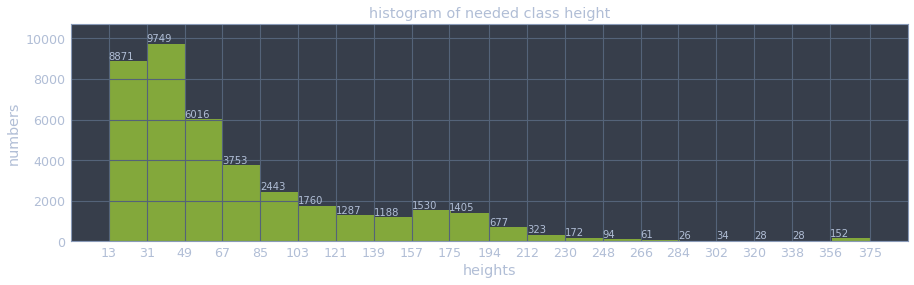

|nums |5330|11353|7032|4282|2934|2005|1499|1179|957|811|643|498|377|315|217|114|32 |14 | 3 | 2 |
|index| 29 | 58  | 87 |116 |145 |174 |203 |232 |261|290|319|348|377|406|435|464|493|522|551|581|


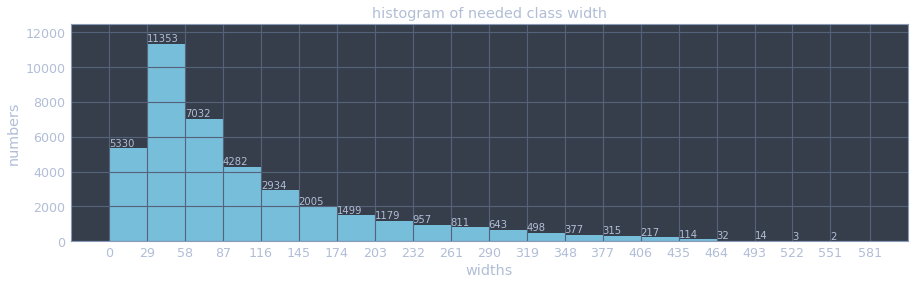

|nums |1484|11450|8650|5148|3358|2313|1670|1338|973|901|732|656|484|161|98 |57 |43 |27 |30 |24 |
|index| 21 | 43  | 65 | 87 |109 |131 |152 |174 |196|218|240|262|284|305|327|349|371|393|415|437|


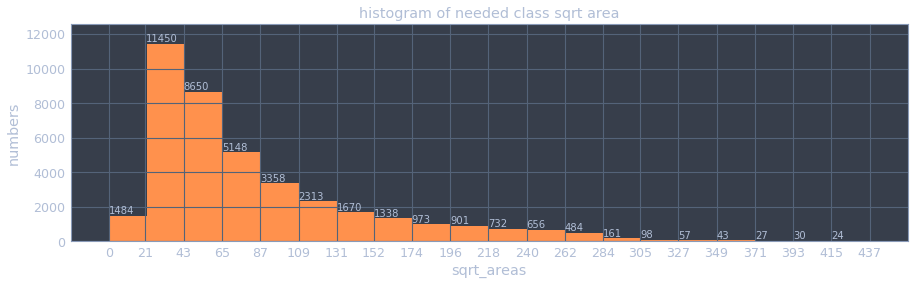

|nums |28397|4628|2094 |1209 | 956 | 693 | 583 | 430 | 252 | 83  | 77  |  44  |  32  |  24  |  23  |  13  |  20  |  14  |  13  |  12  |
|index|9537 |19074|28611|38148|47685|57222|66759|76296|85833|95370|104907|114444|123981|133518|143055|152592|162129|171666|181203|190740|


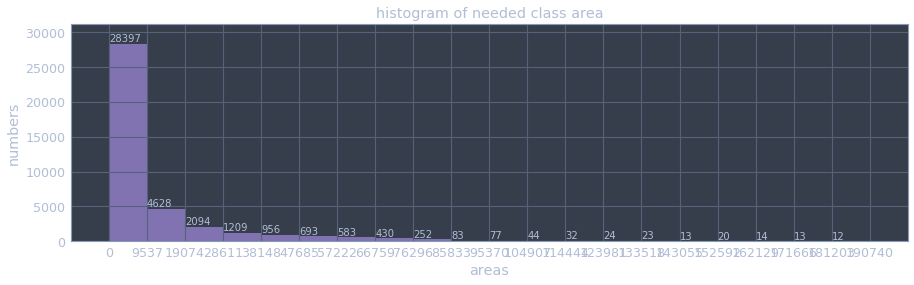

In [41]:
car_height_list = np.concatenate([height_dict[cls] for cls in ['car','van','truck','tram']], axis=0)
car_width_list = np.concatenate([width_dict[cls] for cls in ['car','van','truck','tram']], axis=0)
car_area_list = np.concatenate([area_dict[cls] for cls in ['car','van','truck','tram']], axis=0)
print('total numbers of car: {}'.format(len(car_height_list)))

pedestrian_height_list = np.concatenate([height_dict[cls] 
                                         for cls in ['pedestrian', 'person_sitting']], axis=0)
pedestrian_width_list = np.concatenate([width_dict[cls] 
                                        for cls in ['pedestrian', 'person_sitting']], axis=0)
pedestrian_area_list = np.concatenate([area_dict[cls] 
                                       for cls in ['pedestrian', 'person_sitting']], axis=0)
print('total numbers of pedestrian: {}'.format(len(pedestrian_height_list)))

cyclist_height_list = height_dict['cyclist']
cyclist_width_list = width_dict['cyclist']
cyclist_area_list = area_dict['cyclist']
print('total numbers of cyclist: {}'.format(len(cyclist_height_list)))

needed_class_height_list = np.concatenate([car_height_list, pedestrian_height_list, cyclist_height_list], axis=0)
needed_class_width_list = np.concatenate([car_width_list, pedestrian_width_list, cyclist_width_list], axis=0)
needed_class_area_list = np.concatenate([car_area_list, pedestrian_area_list, cyclist_area_list],axis=0)
print('total numbers of need classes: {}'.format(len(needed_class_height_list)))
needed_class_sqrt_area_list = [np.round(np.sqrt(area)) for area in needed_class_area_list]

# plot histogram function
def plot_hist(data, bins_num, xlabel='xlabel', title='histogram', color='g'):
    fig, ax = plt.subplots(figsize=(15, 4))
    n, bins, patches = ax.hist(data, bins_num, facecolor=color, histtype='bar')  # you can change number of bins
    nums = [ int(num) for num in n]
    indexs = [ int(b) for b in bins]
    str_num = '|nums |'
    str_index = '|index|'
    for i in range(len(nums)):
        length = [len(str(nums[i])), len(str(indexs[i]))]
        str_num += '{:^{}}|'.format(nums[i], np.max(length))
        str_index += '{:^{}}|'.format(indexs[i+1], np.max(length))
    print(str_num)
    print(str_index)
    ax.set_xticks(indexs)
    ax.set_ylim([0, max(nums)*1.1])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('numbers')
    ax.set_title(title)
    for x,y1 in zip(indexs, nums):
        ax.text(x, y1+0.05, '%d' % (y1), ha='left', va= 'bottom')
    plt.show()

plot_hist(needed_class_height_list, 20, 
          xlabel='heights', title='histogram of needed class height', color='g')
plot_hist(needed_class_width_list, 20, 
          xlabel='widths', title='histogram of needed class width', color='c')
plot_hist(needed_class_sqrt_area_list, 20, 
          xlabel='sqrt_areas', title='histogram of needed class sqrt area', color='y')
plot_hist(needed_class_area_list, 20, 
          xlabel='areas', title='histogram of needed class area', color='m')

[28742, 2914, 1094, 4487, 222, 1627, 511, 973, 11295]


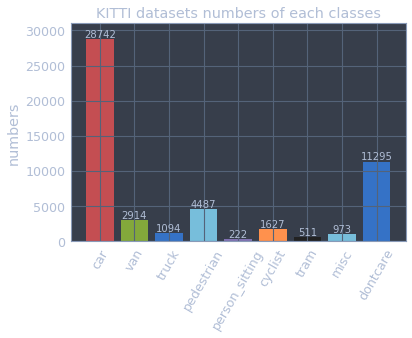

In [32]:
nums_of_each_class = [nums_dict[class_list[i]] for i in range(len(nums_dict))]
print(nums_of_each_class)
fig, ax = plt.subplots()
inds = np.arange(1, len(nums_dict)+1)
b1, b2, b3, b4, b5, b6, b7, b8, b9 = plt.bar(inds, nums_of_each_class)
b1.set_facecolor('r')
b2.set_facecolor('g')
b3.set_facecolor('b')
b4.set_facecolor('c')
b5.set_facecolor('m')
b6.set_facecolor('y')
b7.set_facecolor('k')
b8.set_facecolor('c')

ax.set_xticks(inds)
ax.set_xticklabels(class_list)
ax.set_ylim([0, 31000])
ax.set_ylabel('numbers')
ax.set_title('KITTI datasets numbers of each classes')
plt.xticks(rotation=60)

for x,y in zip(inds,nums_of_each_class):
    plt.text(x, y+0.05, '%d' % y, ha='center', va= 'bottom')

plt.show()

In [ ]:
car_heights = height_dict[class_list[0]]
print(len(car_heights))
print("max height:{}".format(np.max(car_heights)))
print("min height:{}".format(np.min(car_heights)))

points = [0, 50, 100, 150, 200, 250, 300, 350]

nums_of_heights = [np.sum(np.array(car_heights)>points[i]) - np.sum(np.array(car_heights)>points[i+1])
                 for i in np.arange(len(points)-1)]
print(nums_of_heights)
for i in range(len(points)-1):
    print("numbers of height between {:3} and {:3} is {:5}".format(points[i], points[i+1], nums_of_heights[i]))

In [ ]:
car_widths = width_dict[class_list[0]]
print(len(car_widths))
print("max height:{}".format(np.max(car_widths)))
print("min height:{}".format(np.min(car_widths)))

points = [0, 50, 100, 150, 200, 250, 300, 350]

nums_of_widths = [np.sum(np.array(car_widths)>points[i]) - np.sum(np.array(car_widths)>points[i+1])
                 for i in np.arange(len(points)-1)]
width_pros = [format(width/(1.0*len(car_widths)), '.2f') for width in nums_of_widths] # probability of each stage
print("width probability: {}".format(width_pros))
print("width of each stage: {}".format(nums_of_widths))
for i in range(len(points)-1):
    print("numbers of height between {:3} and {:3} is {:5}".format(points[i], points[i+1], nums_of_widths[i]))

car
car length: 28742
car max height: 335.0
car min height: 13.0
car max width: 581.0
car min width: 0.0
height: [15511, 7615, 2519, 2650, 401, 39, 7]
width: [8318, 8895, 4512, 2548, 1636, 1162, 839]


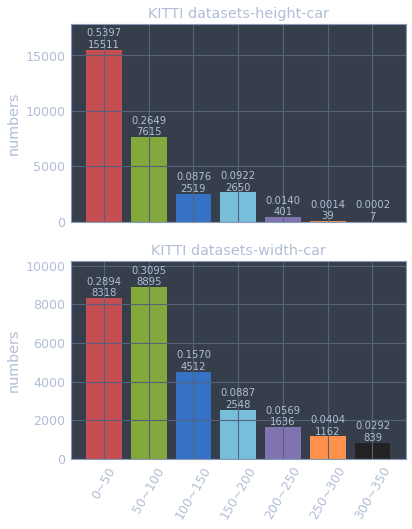

van
van length: 2914
van max height: 375.0
van min height: 17.0
van max width: 537.0
van min width: 3.0
height: [1380, 858, 267, 133, 90, 62, 38]
width: [943, 862, 449, 235, 121, 124, 60]


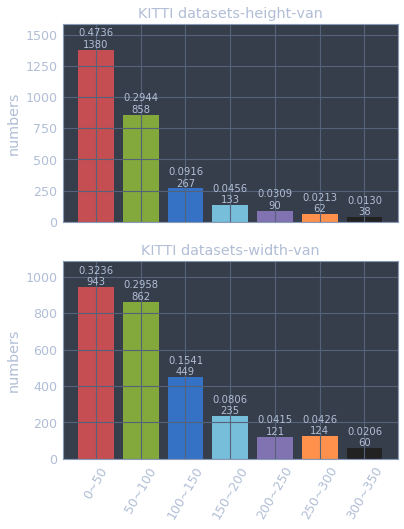

truck
truck length: 1094
truck max height: 375.0
truck min height: 27.0
truck max width: 510.0
truck min width: 2.0
height: [454, 411, 96, 36, 21, 8, 18]
width: [417, 372, 100, 54, 46, 35, 26]


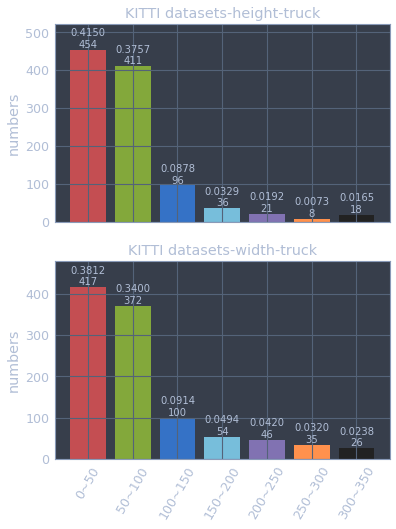

pedestrian
pedestrian length: 4487
pedestrian max height: 294.0
pedestrian min height: 14.0
pedestrian max width: 358.0
pedestrian min width: 0.0
height: [842, 1699, 886, 719, 303, 38, 0]
width: [3053, 1204, 159, 36, 25, 7, 1]


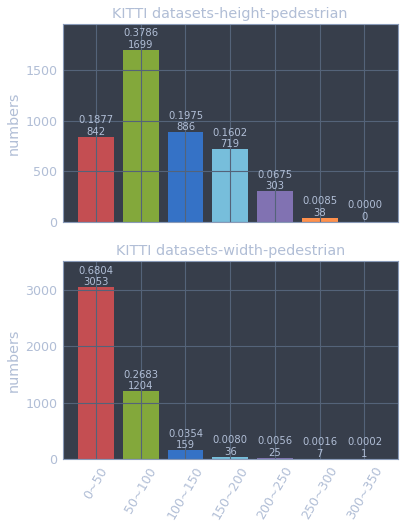

person_sitting
person_sitting length: 222
person_sitting max height: 227.0
person_sitting min height: 32.0
person_sitting max width: 230.0
person_sitting min width: 4.0
height: [18, 95, 85, 22, 2, 0, 0]
width: [54, 105, 42, 17, 4, 0, 0]


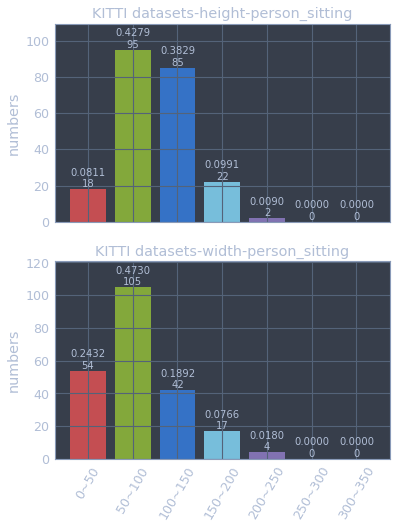

cyclist
cyclist length: 1627
cyclist max height: 295.0
cyclist min height: 16.0
cyclist max width: 370.0
cyclist min width: 6.0
height: [655, 601, 187, 114, 55, 15, 0]
width: [1050, 335, 131, 58, 34, 17, 0]


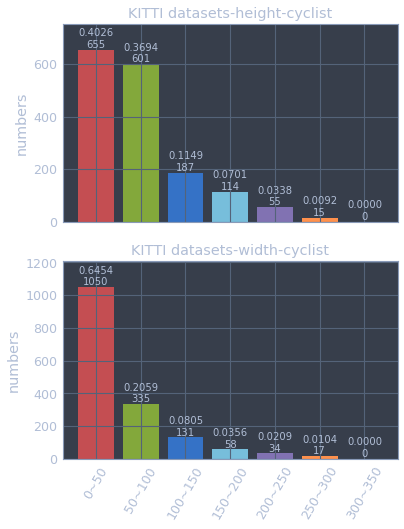

tram
tram length: 511
tram max height: 374.0
tram min height: 20.0
tram max width: 537.0
tram min width: 24.0
height: [166, 174, 81, 20, 21, 6, 16]
width: [98, 166, 53, 41, 43, 33, 23]


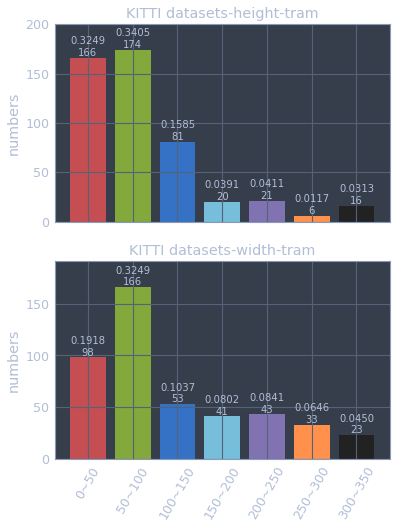

misc
misc length: 973
misc max height: 375.0
misc min height: 13.0
misc max width: 454.0
misc min width: 5.0
height: [476, 305, 97, 50, 12, 6, 7]
width: [392, 298, 120, 65, 32, 30, 16]


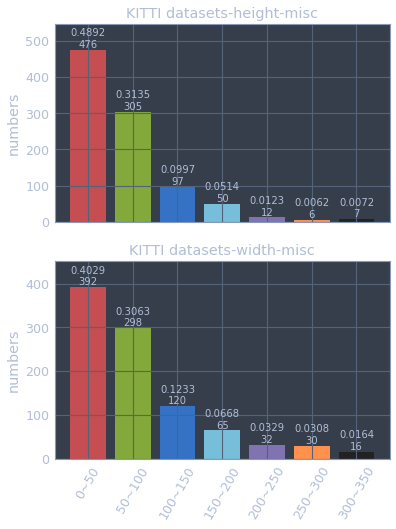

dontcare
dontcare length: 11295
dontcare max height: 374.0
dontcare min height: 3.0
dontcare max width: 709.0
dontcare min width: 3.0
height: [10577, 504, 103, 58, 34, 7, 3]
width: [7782, 2227, 656, 224, 129, 77, 39]


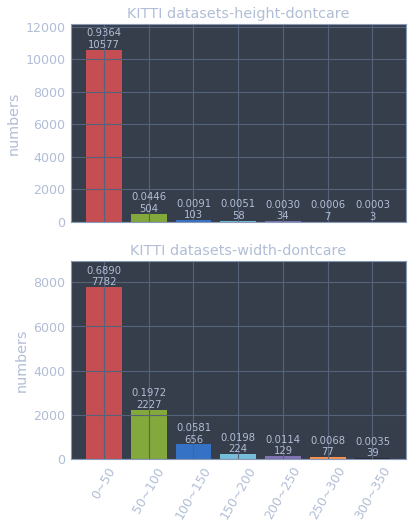

In [12]:
for cls in class_list:
    print(cls)
    cls_heights = height_dict[cls]
    cls_widths = width_dict[cls]
    print('{} length: {}'.format(cls, len(cls_heights)))
    print("{} max height: {}".format(cls, np.max(cls_heights)))
    print("{} min height: {}".format(cls, np.min(cls_heights)))
    print("{} max width: {}".format(cls, np.max(cls_widths)))
    print("{} min width: {}".format(cls, np.min(cls_widths)))

    points = [0, 50, 100, 150, 200, 250, 300, 350]

    nums_of_heights = [np.sum(np.array(cls_heights)>points[i]) - np.sum(np.array(cls_heights)>points[i+1])
                     for i in np.arange(len(points)-1)]
    nums_of_widths = [np.sum(np.array(cls_widths)>points[i]) - np.sum(np.array(cls_widths)>points[i+1])
                     for i in np.arange(len(points)-1)]
    print('height: {}'.format(nums_of_heights))
    print('width: {}'.format(nums_of_widths))
    
    height_pros = [format(height/(1.0*len(cls_heights)), '.4f') for height in nums_of_heights]
    width_pros = [format(width/(1.0*len(cls_widths)), '.4f') for width in nums_of_widths]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 8))
    inds = np.arange(1, len(points))

    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    ax1.bar(inds, nums_of_heights, color=colors)
    ax2.bar(inds, nums_of_widths, color=colors)
    
    ax1.set_xticks(inds)
    ax1.set_xticklabels(['0~50','50~100','100~150','150~200','200~250','250~300','300~350'])
    ax1.set_ylim([0, max(nums_of_heights)*1.15])
    ax1.set_ylabel('numbers')
    ax1.set_title('KITTI datasets-height-{}'.format(cls))
    plt.xticks(rotation=60)
    ax2.set_xticks(inds)
    ax2.set_xticklabels(['0~50','50~100','100~150','150~200','200~250','250~300','300~350'])
    ax2.set_ylim([0, max(nums_of_widths)*1.15])
    ax2.set_ylabel('numbers')
    ax2.set_title('KITTI datasets-width-{}'.format(cls))
    plt.xticks(rotation=60)

    for x,y1,z1,y2,z2 in zip(inds,nums_of_heights, height_pros, nums_of_widths, width_pros):
        ax1.text(x, y1+0.05, '%.4f\n%d' % (np.float(z1), y1), ha='center', va= 'bottom')
        ax2.text(x, y2+0.05, '%.4f\n%d' % (np.float(z2), y2), ha='center', va= 'bottom')
        
    plt.show()
    

car
car length: 28742
car max area: 129582.0
car min area: 0.0
car meas area: 11282.0
21220|7522
|nums |259|5850|6304|4244|2795|1856|1401|1110|963|767|648|613|576|509|418|296|88 |30 |14 | 1 |
|index|18 | 36 | 54 | 72 | 90 |108 |126 |144 |162|180|198|216|234|252|270|288|306|324|342|360|


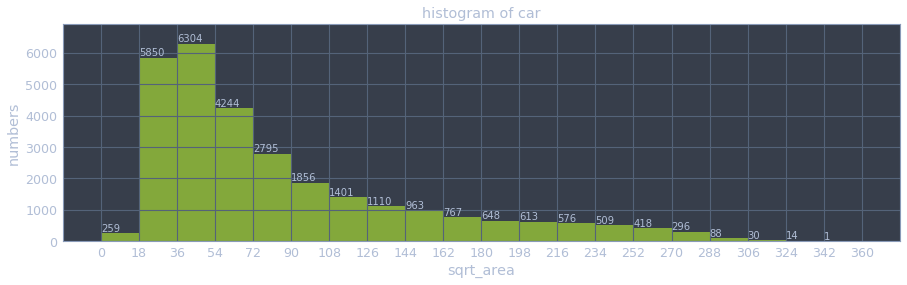

van
van length: 2914
van max area: 185878.0
van min area: 255.0
van meas area: 15566.0
2275|639
|nums |639|683|438|301|187|119|103|77 |56 |45 |44 |25 |30 |25 |51 |29 |21 |15 |15 |11 |
|index|36 |57 |78 |99 |119|140|161|182|202|223|244|265|285|306|327|348|368|389|410|431|


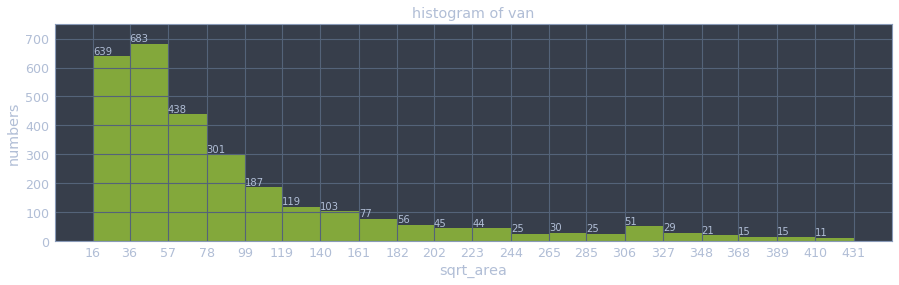

truck
truck length: 1094
truck max area: 190740.0
truck min area: 744.0
truck meas area: 15138.0
872|222
|nums |397|258|129|58|41 |40 |41 |20 |14 |10 | 9 |11 | 9 | 5 |12 | 9 | 8 | 4 | 9 |10 |
|index|47 |68 |88 |109|129|150|170|191|211|232|252|273|293|314|334|355|375|396|416|437|


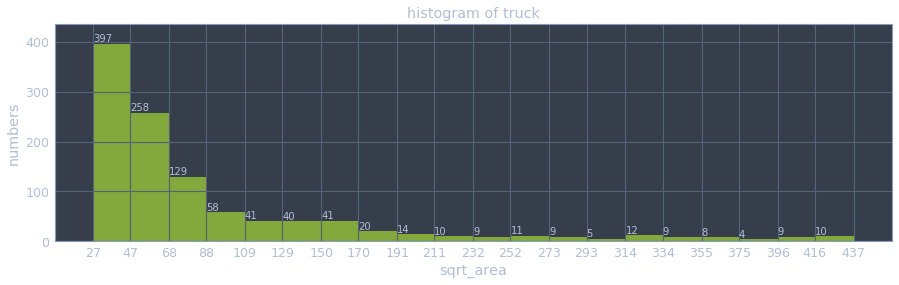

pedestrian
pedestrian length: 4487
pedestrian max area: 90932.0
pedestrian min area: 0.0
pedestrian meas area: 6220.0
3031|1456
|nums |94|776|967|647|465|332|384|305|214|116|79 |41 |16 |18 |13 | 8 | 7 | 1 | 2 | 2 |
|index|15|30 |45 |60 |75 |90 |105|120|135|151|166|181|196|211|226|241|256|271|286|302|


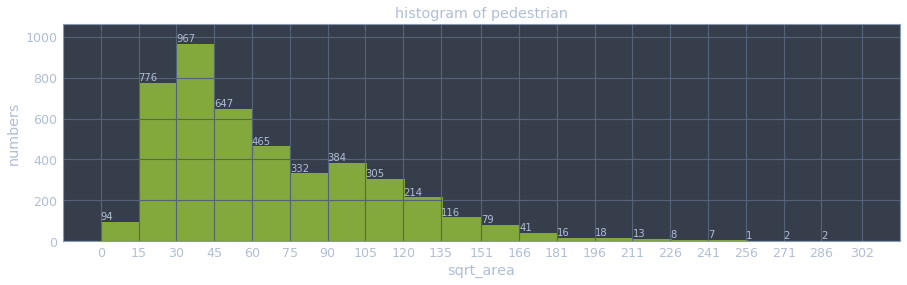

person_sitting
person_sitting length: 222
person_sitting max area: 42449.0
person_sitting min area: 540.0
person_sitting meas area: 9725.0
138|84
|nums |7 |3 |18|27|24|23|20|13|12|16 | 9 | 9 |11 |14 | 6 | 5 | 3 | 1 | 0 | 1 |
|index|32|41|50|59|68|77|87|96|105|114|123|132|141|151|160|169|178|187|196|206|


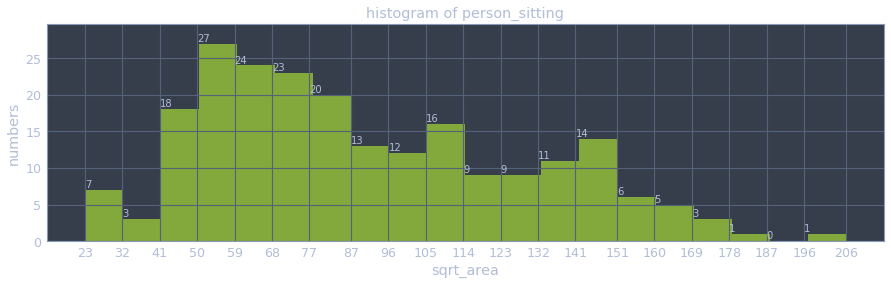

cyclist
cyclist length: 1627
cyclist max area: 79165.0
cyclist min area: 96.0
cyclist meas area: 6674.0
1239|388
|nums |223|361|266|248|109|94|59|58 |33 |38 |19 |24 |19 |20 |17 |12 |12 | 7 | 5 | 3 |
|index|23 |37 |50 |64 |77 |91|104|118|131|145|159|172|186|199|213|226|240|253|267|281|


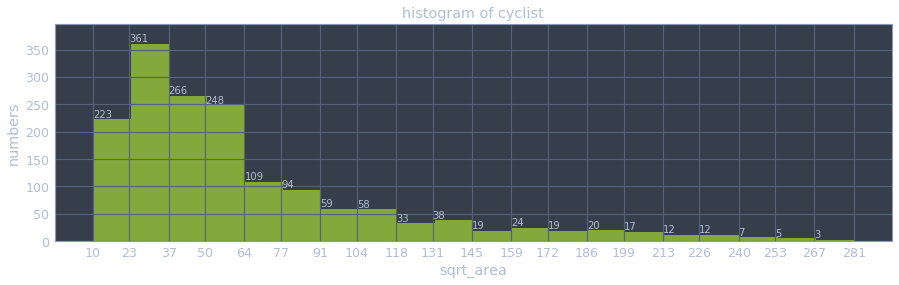

tram
tram length: 511
tram max area: 188700.0
tram min area: 480.0
tram meas area: 25041.0
385|126
|nums |83|121|40|41|46 |33 |29 |12 |17 |11 | 7 |13 |11 | 8 | 3 | 7 |10 | 7 | 4 | 8 |
|index|42|63 |83|104|125|145|166|186|207|228|248|269|289|310|331|351|372|392|413|434|


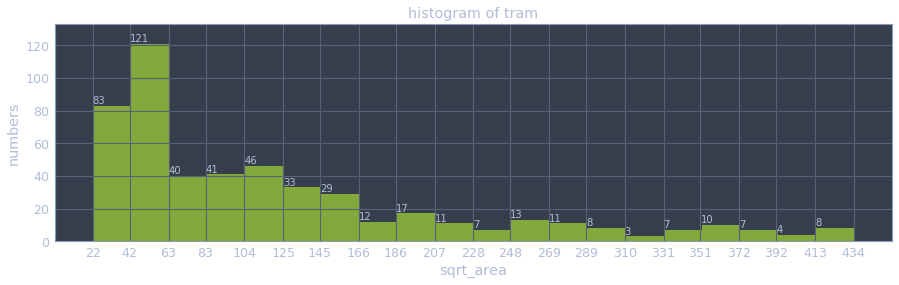

misc
misc length: 973
misc max area: 170250.0
misc min area: 300.0
misc meas area: 10899.0
749|224
|nums |238|247|146|106|45|49 |37 |27 |15 |15 |10 | 3 | 9 | 3 | 3 | 2 | 4 | 8 | 3 | 3 |
|index|36 |56 |76 |96 |116|135|155|175|195|215|234|254|274|294|314|333|353|373|393|413|


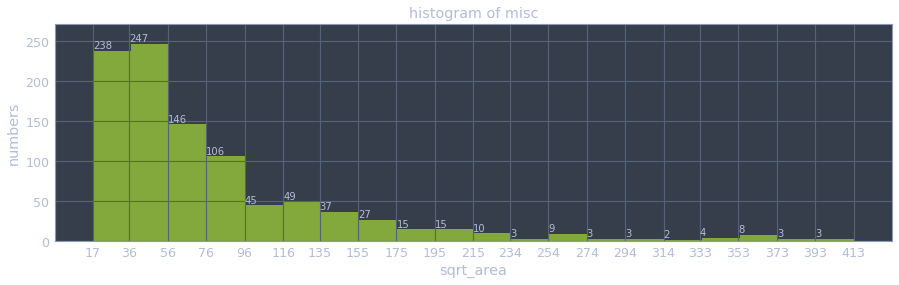

dontcare
dontcare length: 11295
dontcare max area: 138010.0
dontcare min area: 9.0
dontcare meas area: 1884.0
8994|2301
|nums |4274|4244|1556|557|222|147|123|68 |35 |30 |15 | 3 | 3 | 3 | 8 | 1 | 1 | 3 | 1 | 1 |
|index| 21 | 39 | 58 |76 |95 |113|131|150|168|187|205|223|242|260|279|297|315|334|352|371|


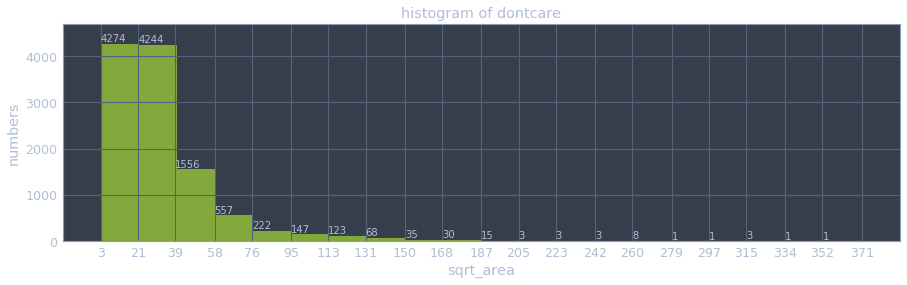

In [13]:
import matplotlib.pyplot as plt

for cls in class_list:
    print(cls)
    cls_areas = area_dict[cls]
    print('{} length: {}'.format(cls, len(cls_areas)))
    print("{} max area: {}".format(cls, np.max(cls_areas)))
    print("{} min area: {}".format(cls, np.min(cls_areas)))
    print('{} meas area: {}'.format(cls,round(np.mean(cls_areas))))
    
    min_area = np.min(cls_areas)
    mean_area = np.round(np.mean(cls_areas))
    sqrt_area = [np.round(np.sqrt(cls_area)) for cls_area in cls_areas]
    points = [0, 50, 100, 150, 200, 250, 300, 350]
    
    num1 = np.sum(np.array(cls_areas)>min_area) - np.sum(np.array(cls_areas)>mean_area)
    print('{}|{}'.format(num1, len(cls_areas)-num1))
    fig, ax = plt.subplots(figsize=(15, 4))
    n, bins, patches = ax.hist(sqrt_area, 20, facecolor='g', histtype='bar')  # you can change number of bins
    nums = [ int(num) for num in n]
    indexs = [ int(b) for b in bins]
    str_num = '|nums |'
    str_index = '|index|'
    for i in range(len(nums)):
        length = [len(str(nums[i])), len(str(indexs[i]))]
        str_num += '{:^{}}|'.format(nums[i], np.max(length))
        str_index += '{:^{}}|'.format(indexs[i+1], np.max(length))
    print(str_num)
    print(str_index)
    ax.set_xticks(indexs)
    ax.set_ylim([0, max(nums)*1.1])
    ax.set_xlabel('sqrt_area')
    ax.set_ylabel('numbers')
    ax.set_title('histogram of {}'.format(cls))
    for x,y1 in zip(indexs, nums):
        ax.text(x, y1+0.05, '%d' % (y1), ha='left', va= 'bottom')
    plt.show()
    